In [1]:
# required imports

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
# read and view data

df = pd.read_csv('turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


(33.5, -0.5)

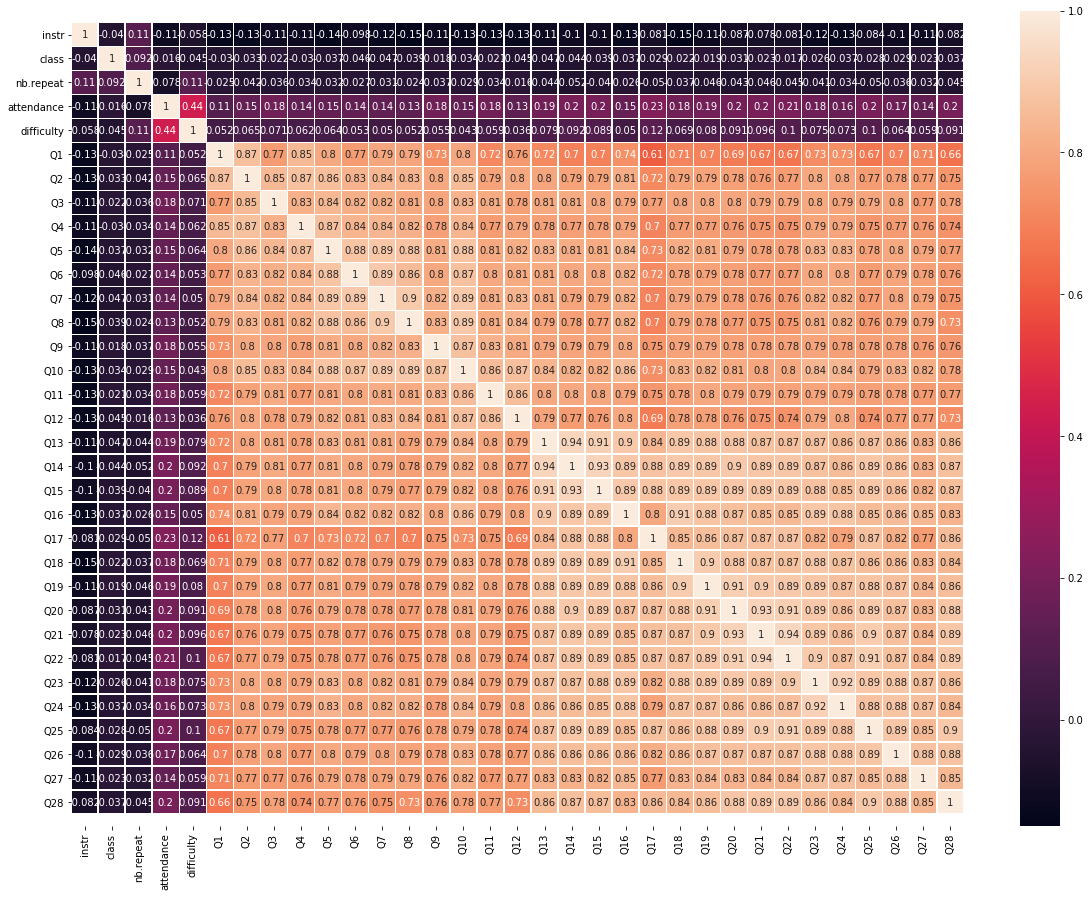

In [3]:
# correlation matrix

correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
plt.figure(figsize = (20,15))
ax = sn.heatmap(correlation_matrix, annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [4]:
# Group the questions in two classes: 
# 1) Course related Questions
# 2) Instructor related Questions

C_columns = ['Q' + str(x) for x in range(1, 13)]
I_columns = ['Q' + str(x) for x in range(13, 29)]

df['course_feeedback'] = df[C_columns].apply(lambda x: sum(x)//len(C_columns), axis=1)

df['instructor_feeedback'] = df[I_columns].apply(lambda x: sum(x)//len(I_columns), axis=1)

In [5]:
# columns data types

df.dtypes

instr                   int64
class                   int64
nb.repeat               int64
attendance              int64
difficulty              int64
Q1                      int64
Q2                      int64
Q3                      int64
Q4                      int64
Q5                      int64
Q6                      int64
Q7                      int64
Q8                      int64
Q9                      int64
Q10                     int64
Q11                     int64
Q12                     int64
Q13                     int64
Q14                     int64
Q15                     int64
Q16                     int64
Q17                     int64
Q18                     int64
Q19                     int64
Q20                     int64
Q21                     int64
Q22                     int64
Q23                     int64
Q24                     int64
Q25                     int64
Q26                     int64
Q27                     int64
Q28                     int64
course_fee

In [6]:
# count the target variable
# we can see that it is highly imbalanced

df['nb.repeat'].value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

In [7]:
# Drop the question columns since they are correlated

Q_columns = ['Q' + str(x) for x in range(1, 29)]
df = df.drop(Q_columns, axis=1)

In [8]:
# preview

df.head()

,instr,class,nb.repeat,attendance,difficulty,course_feeedback,instructor_feeedback
0,1,2,1,0,4,3,3
1,1,2,1,1,3,3,3
2,1,2,1,2,4,5,5
3,1,2,1,1,3,3,3
4,1,2,1,0,1,1,1


(7.5, -0.5)

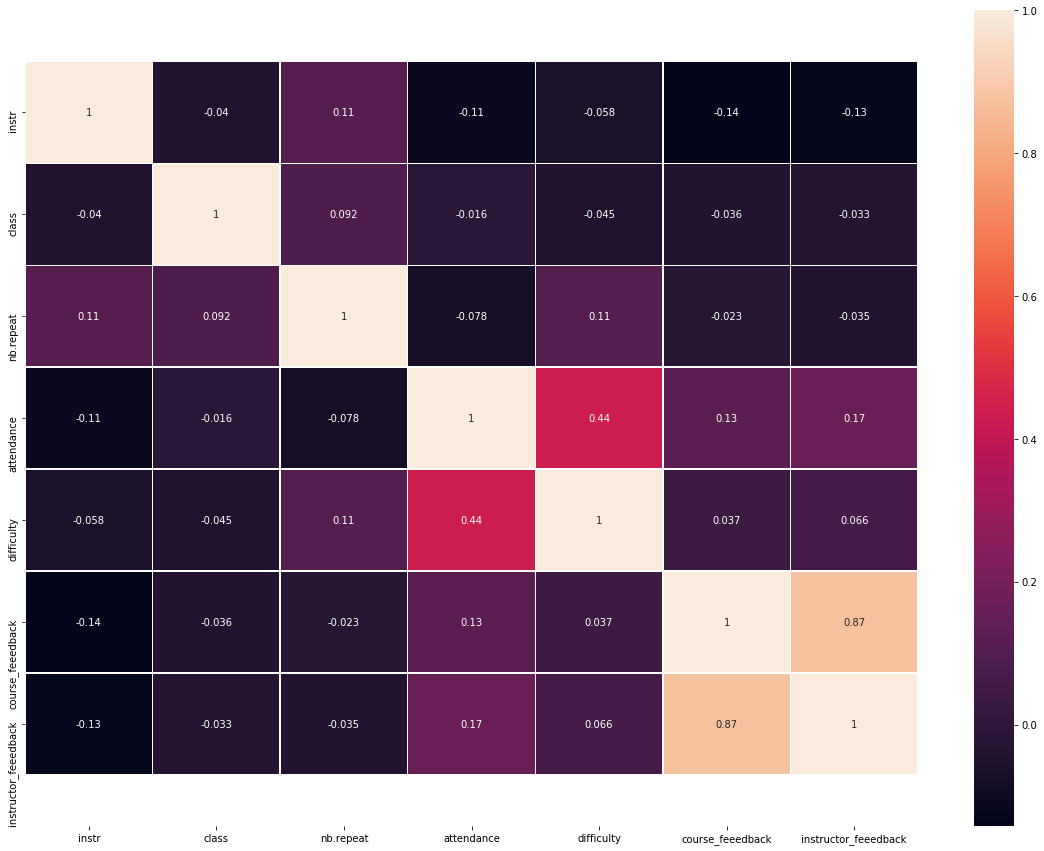

In [9]:
# re display correlation matrix

correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
plt.figure(figsize = (20,15))
ax = sn.heatmap(correlation_matrix, annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [10]:
# Separate features and target column

X = df.drop(['nb.repeat'], axis=1)
y = df['nb.repeat']

In [11]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [12]:
# Count target classes

y_train.value_counts()

1    3436
2     403
3     235
Name: nb.repeat, dtype: int64

In [13]:
# Use Decision trees and view its training performance

dt_clf = DecisionTreeClassifier(class_weight='balanced')
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      0.78      0.87      3436
           2       0.45      0.84      0.58       403
           3       0.35      0.93      0.51       235

    accuracy                           0.79      4074
   macro avg       0.60      0.85      0.66      4074
weighted avg       0.90      0.79      0.82      4074

0.7930780559646539


In [14]:
# View testing accuracy

y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.71      0.79      1473
           2       0.17      0.31      0.22       173
           3       0.13      0.34      0.19       100

    accuracy                           0.65      1746
   macro avg       0.40      0.45      0.40      1746
weighted avg       0.78      0.65      0.70      1746

0.6483390607101948


In [15]:
# Use Random Forest and view its training performance

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.98      0.85      0.91      3436
           2       0.51      0.78      0.62       403
           3       0.43      0.85      0.57       235

    accuracy                           0.84      4074
   macro avg       0.64      0.83      0.70      4074
weighted avg       0.90      0.84      0.86      4074

0.8433971526755032


In [16]:
# View testing accuracy

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.82      0.85      1473
           2       0.20      0.25      0.22       173
           3       0.15      0.24      0.18       100

    accuracy                           0.73      1746
   macro avg       0.41      0.44      0.42      1746
weighted avg       0.78      0.73      0.75      1746

0.7331042382588774


In [17]:
# Use SVM and view its training performance

svm_clf = svm.LinearSVC(class_weight='balanced', multi_class='ovr')
svm_clf.fit(X_train, y_train)
y_pred_train = svm_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.85      0.99      0.91      3436
           2       0.24      0.03      0.06       403
           3       0.21      0.03      0.05       235

    accuracy                           0.84      4074
   macro avg       0.43      0.35      0.34      4074
weighted avg       0.75      0.84      0.78      4074

0.8367697594501718


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
# View testing accuracy

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.98      0.91      1473
           2       0.27      0.05      0.08       173
           3       0.33      0.03      0.06       100

    accuracy                           0.84      1746
   macro avg       0.48      0.35      0.35      1746
weighted avg       0.76      0.84      0.78      1746

0.8367697594501718


In [19]:
# Use XGBoost and view its training performance

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_train = xgb_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92      3436
           2       0.40      0.00      0.01       403
           3       0.67      0.03      0.06       235

    accuracy                           0.84      4074
   macro avg       0.64      0.35      0.33      4074
weighted avg       0.79      0.84      0.78      4074

0.8448699067255768


In [20]:
# View testing accuracy

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.98      0.91      1473
           2       0.27      0.05      0.08       173
           3       0.33      0.03      0.06       100

    accuracy                           0.84      1746
   macro avg       0.48      0.35      0.35      1746
weighted avg       0.76      0.84      0.78      1746

0.8367697594501718


In [21]:
# Use Naive Bayes Algorithm and view its training performance

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_train = nb_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.84      1.00      0.92      3436
           2       0.00      0.00      0.00       403
           3       0.00      0.00      0.00       235

    accuracy                           0.84      4074
   macro avg       0.28      0.33      0.31      4074
weighted avg       0.71      0.84      0.77      4074

0.8433971526755032


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# View testing accuracy

y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      1.00      0.92      1473
           2       0.00      0.00      0.00       173
           3       0.00      0.00      0.00       100

    accuracy                           0.84      1746
   macro avg       0.28      0.33      0.31      1746
weighted avg       0.71      0.84      0.77      1746

0.8436426116838488


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Over Sampling using SMOTE

In [23]:
sm = SMOTE(sampling_strategy='not majority', random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

unique_elements, counts_elements = np.unique(y_train_res, return_counts=True)
list(zip(unique_elements, counts_elements))

[(1, 3436), (2, 3436), (3, 3436)]

### Implementing all the algorithms used above on the over sampled data

In [24]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_res, y_train_res)
y_pred_train = dt_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.85      0.80      0.82      3436
           2       0.79      0.85      0.82      3436
           3       0.85      0.84      0.85      3436

    accuracy                           0.83     10308
   macro avg       0.83      0.83      0.83     10308
weighted avg       0.83      0.83      0.83     10308

Accuracy:  0.8301319363601086


In [25]:
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.69      0.78      1473
           2       0.18      0.40      0.25       173
           3       0.11      0.28      0.16       100

    accuracy                           0.64      1746
   macro avg       0.40      0.46      0.40      1746
weighted avg       0.79      0.64      0.70      1746

0.6380297823596792


In [26]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)
y_pred_train = rf_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.86      0.78      0.82      3436
           2       0.79      0.85      0.82      3436
           3       0.84      0.85      0.85      3436

    accuracy                           0.83     10308
   macro avg       0.83      0.83      0.83     10308
weighted avg       0.83      0.83      0.83     10308

Accuracy:  0.8301319363601086


In [27]:
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.71      0.80      1473
           2       0.19      0.37      0.25       173
           3       0.12      0.30      0.17       100

    accuracy                           0.65      1746
   macro avg       0.40      0.46      0.41      1746
weighted avg       0.79      0.65      0.71      1746

0.6540664375715922


In [28]:
nb_clf = GaussianNB()
nb_clf.fit(X_train_res, y_train_res)

y_pred_train = nb_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.49      0.53      0.51      3436
           2       0.48      0.48      0.48      3436
           3       0.46      0.42      0.44      3436

    accuracy                           0.48     10308
   macro avg       0.48      0.48      0.47     10308
weighted avg       0.48      0.48      0.47     10308

Accuracy:  0.4759410166860691


In [29]:
y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.53      0.66      1473
           2       0.15      0.39      0.22       173
           3       0.06      0.26      0.10       100

    accuracy                           0.50      1746
   macro avg       0.37      0.39      0.33      1746
weighted avg       0.77      0.50      0.59      1746

0.497709049255441


## Over sampling using ADASYN

In [30]:
sm = ADASYN(sampling_strategy='not majority', random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

unique_elements, counts_elements = np.unique(y_train_res, return_counts=True)
list(zip(unique_elements, counts_elements))

[(1, 3436), (2, 3373), (3, 3464)]

### Implementing all the algorithms used above on the over sampled data

In [31]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_res, y_train_res)
y_pred_train = dt_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.88      0.76      0.82      3436
           2       0.79      0.83      0.81      3373
           3       0.81      0.87      0.84      3464

    accuracy                           0.82     10273
   macro avg       0.82      0.82      0.82     10273
weighted avg       0.82      0.82      0.82     10273

Accuracy:  0.8205003406989195


In [32]:
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.67      0.77      1473
           2       0.20      0.40      0.26       173
           3       0.10      0.30      0.15       100

    accuracy                           0.62      1746
   macro avg       0.40      0.45      0.39      1746
weighted avg       0.79      0.62      0.68      1746

0.6179839633447881


In [33]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)
y_pred_train = rf_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.89      0.75      0.81      3436
           2       0.79      0.83      0.81      3373
           3       0.80      0.88      0.84      3464

    accuracy                           0.82     10273
   macro avg       0.82      0.82      0.82     10273
weighted avg       0.82      0.82      0.82     10273

Accuracy:  0.8205003406989195


In [34]:
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.68      0.78      1473
           2       0.20      0.38      0.26       173
           3       0.10      0.33      0.16       100

    accuracy                           0.63      1746
   macro avg       0.40      0.46      0.40      1746
weighted avg       0.79      0.63      0.69      1746

0.6288659793814433


In [35]:
nb_clf = GaussianNB()
nb_clf.fit(X_train_res, y_train_res)
y_pred_train = nb_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.49      0.52      0.50      3436
           2       0.45      0.41      0.43      3373
           3       0.42      0.43      0.43      3464

    accuracy                           0.46     10273
   macro avg       0.45      0.46      0.45     10273
weighted avg       0.45      0.46      0.45     10273

Accuracy:  0.4554657840942276


In [36]:
y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.52      0.66      1473
           2       0.14      0.31      0.19       173
           3       0.06      0.28      0.09       100

    accuracy                           0.49      1746
   macro avg       0.36      0.37      0.32      1746
weighted avg       0.76      0.49      0.58      1746

0.48739977090492553


### From all the implemented methods we see that random forest with SMOTE and ADASYN works well 

##### Please suggest any more cool feature engineering way or any other thing to do to increase the accuracy